In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Getting Data

In [3]:
df=pd.read_csv(r"C:\Users\SakthiBalajiDS\Documents\Jypiter\Capstone\Review3\Philips_Data_review3_Sakthi.csv")
# df

In [296]:
df1 = df[['date','Agency_SKU-545']].copy()
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.set_index('date')
# df1

,Agency_SKU-545
date,
2013-01-01,1657.82
2013-02-01,1501.09
2013-03-01,1888.25
2013-04-01,1498.63
2013-05-01,1620.78
2013-06-01,1521.79
2013-07-01,1711.88
2013-08-01,1550.85
2013-09-01,1265.14


# Visulaizing the data

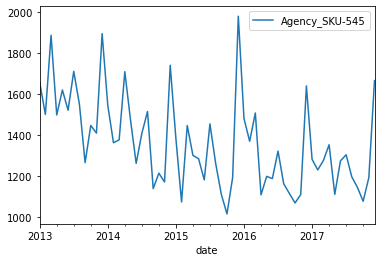

In [5]:
df1.plot()

# Stationary Check

In [64]:
from statsmodels.tsa.stattools import adfuller

In [222]:
a = pd.DataFrame()
def stat(a):
    stationary_test_result = adfuller(a)
    return ("stationary_test_result: ", stationary_test_result[1])


In [224]:
# stat(df1)

# Differencing

In [8]:
df1_diff = df1.copy()
df1_diff['Agency_SKU-545'] = df1['Agency_SKU-545'] - df1['Agency_SKU-545'].shift(1)


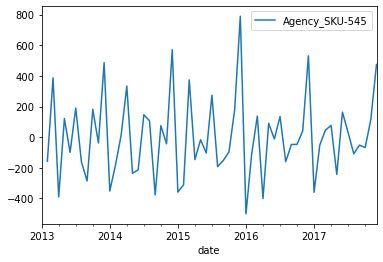

In [214]:
df1_diff.plot()

In [225]:
# stat(df1_diff.dropna())

# Seasoality and Trend Check (Decomposition)

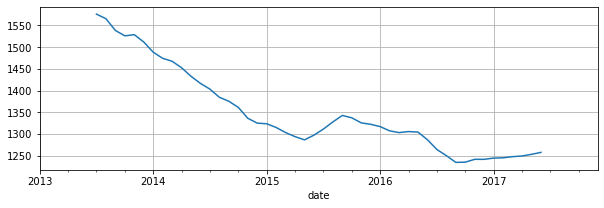

In [298]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(df1['Agency_SKU-545'], period=12, model='additive')
res.trend.plot(label = 'Agency_SKU-545', legend = False, grid = True, figsize = (10,3))

# Grid Search

In [38]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df1['Agency_SKU-545'], trace=True,
suppress_warnings=True, m = 12, seasonal = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=829.306, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=791.592, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=827.306, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=823.686, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=789.476, Time=0.76 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=803.287, Time=0.58 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=784.240, Time=1.18 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=788.035, Time=0.29 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=779.630, Time=1.61 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=802.382, T

# Fixing p, d, q values(ACF and PACF)

In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


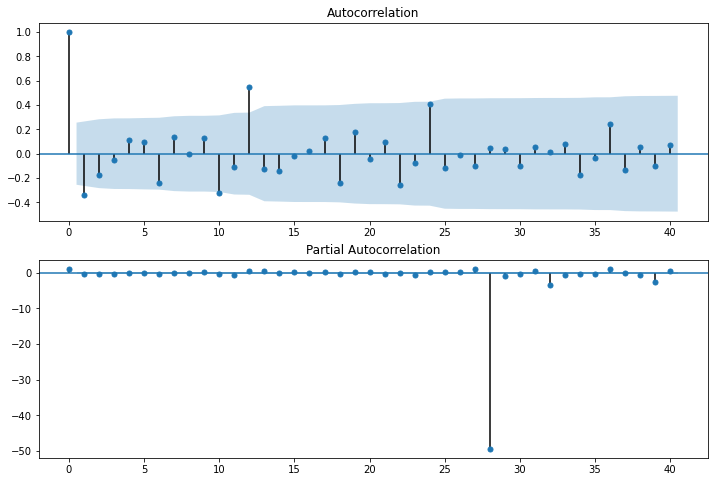

In [50]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1_diff['Agency_SKU-545'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1_diff['Agency_SKU-545'].iloc[1:],lags=40,ax=ax2)


In [39]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(3, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -381.588
Date:                              Mon, 07 Dec 2020   AIC                            777.177
Time:                                      14:37:22   BIC                            791.719
Sample:                                           0   HQIC                           782.853
                                               - 60                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0417      0.854     -0.049      0.961      -1.716       1.633
ar.L1         -0.7552      0.163     -4.639      0.000      -1.074      -0.436
ar.L2         -0.5087      0.155     -3.279      0.001      -0.813      -0.205
ar.L3         -0.2652      0.137     -1.939      0.053      -0.533       0.003
ar.S.L12       0.9970      0.059     16.886      0.000       0.881       1.113
ma.S.L12      -0.8862      1.075     -0.824      0.410      -2.993       1.221
sigma2      1.544e+04    1.5e+04      1.029      0.303    -1.4e+04    4.48e+04
===================================================================================
Ljung-Box (Q):                       23.09   Jarque-Bera (JB):                10.80
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.23
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Generating Test and Train dataset

In [15]:
from datetime import datetime, timedelta

In [295]:
train_end = datetime(2016,12,31)
test_end = datetime(2017,12,31)

train_data =df1[:train_end]
# train_data

test_data = df1[train_end + timedelta(days=1):test_end]
# test_data

# test_data_1 = test_data.copy()

# Validation Checks(RMSE, MAPE)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(actual, prediction):
    mse = mean_squared_error(actual, prediction)
    rmse = sqrt(mse)
    return ("RMSE: ",rmse)

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return ("MAPE: ", np.mean(np.abs((actual - pred) / actual)) * 100)



# Model Fitting and Prediction

In [54]:
pred_start_date = test_data.index[0]
# pred_start_date
pred_end_date = test_data.index[-1]
# pred_end_date

# ARIMA

In [51]:
from statsmodels.tsa.arima_model import ARIMA

In [58]:
model=ARIMA(train_data,order=(0,1,1))
model_fit=model.fit()

model_fit.summary()

c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Agency_SKU-545   No. Observations:                   47
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -318.695
Method:                       css-mle   S.D. of innovations            204.509
Date:                Mon, 07 Dec 2020   AIC                            643.389
Time:                        15:31:41   BIC                            648.939
Sample:                    02-01-2013   HQIC                           645.478
                         - 12-01-2016                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.3337      2.131     -3.911      0.000     -12.510      -4.157
ma.L1.D.Agency_SKU-545    -1.0000      0.066    -15.158      0.000      -1.129      -0.871
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [55]:
predictions_arima = model_fit.predict(start=pred_start_date, end=pred_end_date)

<Figure size 720x288 with 0 Axes>

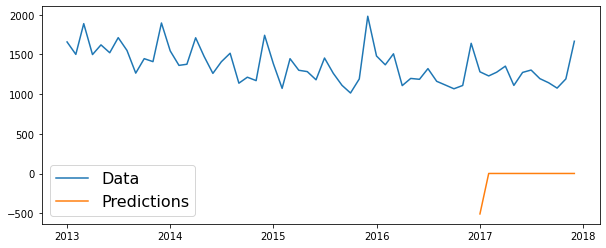

In [56]:
plt.figure(figsize=(10,4))

plt.plot(df1['Agency_SKU-545'])
plt.plot(predictions_arima)

plt.legend(('Data', 'Predictions'), fontsize=16)

# SARIMA

In [252]:
import statsmodels.api as sm

In [253]:
model_sarima = sm.tsa.statespace.SARIMAX(train_data['Agency_SKU-545'],order=(3, 1, 0),seasonal_order=(1,0,1,12))
results_sarima = model_sarima.fit()
predictions_sarima = results_sarima.predict(start=pred_start_date, end=pred_end_date)

c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [254]:
predicted_df_sarima=pd.DataFrame(predictions_sarima)
# predicted_df

In [193]:
# test_data.index

In [256]:
test_data.merge(predicted_df_sarima, on = test_data.index).to_clipboard()

<Figure size 864x288 with 0 Axes>

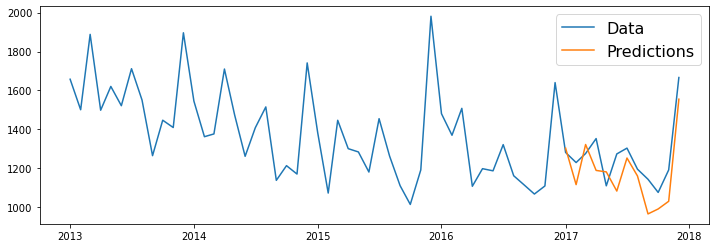

In [255]:
plt.figure(figsize=(12,4))

plt.plot(df1['Agency_SKU-545'])
plt.plot(predictions_sarima)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [206]:
mape(test_data, predictions_sarima)
rmse(test_data, predictions_sarima)

('MAPE: ', 13.502385785093601)

('RMSE: ', 117.19617810695009)

# Rolling Forecast 

In [284]:
train_data_1 = train_data.copy()

for i in test_data.index:
    model1=sm.tsa.statespace.SARIMAX(train_data_1['Agency_SKU-545'],order=(3, 1, 0),seasonal_order=(1,0,1,12))
    results1=model1.fit()
    predictions1 = results1.predict(start= i, end= i)
    predicted_df1= pd.DataFrame(predictions1)
    predicted_df1.columns =['Agency_SKU-545'] 
    train_data_1 = train_data_1.append(predicted_df1, ignore_index = False)

c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sakthibalajids\appdata\local\programs\

In [283]:
# train_data_1 = train_data.copy()

# predicted_df1= pd.DataFrame()

    
# for i in test_data.index:
#     model1=sm.tsa.statespace.SARIMAX(train_data_1['Agency_SKU-545'],order=(3, 1, 0),seasonal_order=(1,0,1,12))
#     results1=model1.fit()
#     predictions1 = results1.predict(start= i, end= i)
#     predicted_df1 = predicted_df1.append( pd.DataFrame(predictions1), ignore_index=False)
#     predicted_df1.columns =['Agency_SKU-545'] 
#     train_data_1 = train_data_1.append(predicted_df1, ignore_index = False)
# predicted_df1

c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sakthibalajids\appdata\local\programs\

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [288]:
test_data.merge(train_data_1[-12:], on = test_data.index).to_clipboard()


<Figure size 864x288 with 0 Axes>

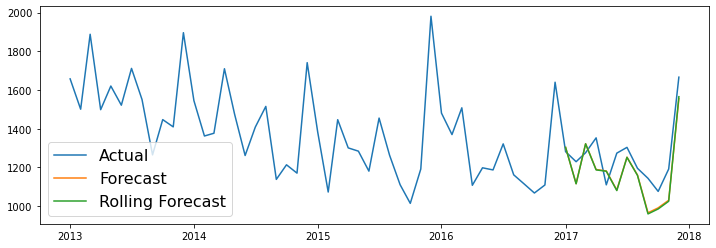

In [151]:
plt.figure(figsize=(12,4))

plt.plot(df1)
plt.plot(predictions)
plt.plot(train_data_1[-12:])

plt.legend(('Actual', 'Forecast', 'Rolling Forecast'), fontsize=16)

In [ ]:
mape(test_data, predictions1)
rmse(test_data, predictions1)

# Holt Winter's

In [175]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [176]:
model_hw = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()

c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [187]:
predictions_hw = model_hw.predict(start=pred_start_date, end=pred_end_date)

In [188]:
predicted_df_hw =pd.DataFrame(predictions_hw)
test_data.merge(predicted_df_hw, on = test_data.index).to_clipboard()

<Figure size 864x288 with 0 Axes>

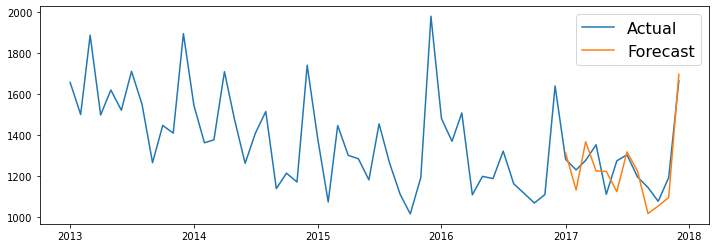

In [178]:
plt.figure(figsize=(12,4))

plt.plot(df1)
plt.plot(predictions_hw)


plt.legend(('Actual', 'Forecast'), fontsize=16)

# ARMA

In [184]:

from statsmodels.tsa.arima_model import ARMA

model_arma = ARMA(train_data, order=(3,0)).fit()

c:\users\sakthibalajids\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [185]:
predictions_arma = model_arma.predict(start=pred_start_date, end=pred_end_date)

<Figure size 864x288 with 0 Axes>

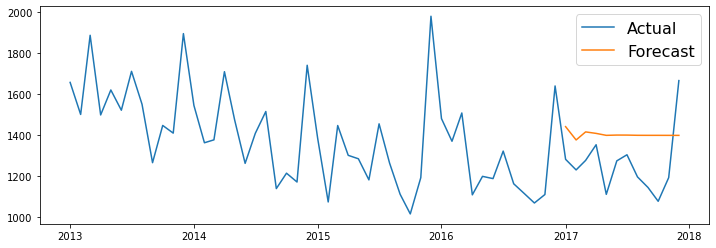

In [186]:
plt.figure(figsize=(12,4))

plt.plot(df1)
plt.plot(predictions_arma)


plt.legend(('Actual', 'Forecast'), fontsize=16)

In [1]:
pip install pystan


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fbprophet


Note: you may need to restart the kernel to use updated packages.  Downloading holidays-0.10.4.tar.gz (120 kB)



    ERROR: Command errored out with exit status 1:
     command: 'c:\users\swetasaran\appdata\local\programs\python\python37\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\SWETAS~1\\AppData\\Local\\Temp\\pip-install-qft6wz3i\\fbprophet_c8efda3d38f74defbebe0d9215c0b432\\setup.py'"'"'; __file__='"'"'C:\\Users\\SWETAS~1\\AppData\\Local\\Temp\\pip-install-qft6wz3i\\fbprophet_c8efda3d38f74defbebe0d9215c0b432\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\SWETAS~1\AppData\Local\Temp\pip-record-swg2ed9k\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\swetasaran\appdata\local\programs\python\python37\Include\fbprophet'
         cwd: C:\Users\SWETAS~1\AppData\Local\Temp\pip-install-qft6wz3i\fbprophet_c8efda3d38f74defbebe0d9215c0b432\
    Complete output (46 lin

Using legacy 'setup.py install' for fbprophet, since package 'wheel' is not installed.
Using legacy 'setup.py install' for holidays, since package 'wheel' is not installed.
Using legacy 'setup.py install' for pymeeus, since package 'wheel' is not installed.
    Running setup.py install for pymeeus: started
    Running setup.py install for pymeeus: finished with status 'done'
    Running setup.py install for holidays: started
    Running setup.py install for holidays: finished with status 'done'
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


In [3]:
python -m pip install Cython

SyntaxError: invalid syntax (<ipython-input-3-1b96a853b6f0>, line 1)